# Initial Project

## Reading the data into Python

We start by opening the files and loading them into a Numpy array

In [1]:
import h5py
import pandas
import numpy as np

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/') [0]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')
test  = load_data('test')

all_features = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X = train[all_features]
y_true = train['Truth']
y_energy = train['p_truth_E']
X_test = test[all_features]

In [2]:
X_electron = X[y_true == 1]
X_not_electron = X[y_true == 0]

y_energy_electron = y_energy[y_true == 1]
y_energy_not_electron = y_energy[y_true == 0]

# Regression


In [3]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Random seed
import random
random.seed(2)

### Splitting the data into test data and validation data

In [4]:
Train, Val, _, _ = train_test_split(train, train['Truth'], test_size=0.10)

In [257]:
# Train data
X_train = Train[all_features]       # all features
y_train_energy = Train['p_truth_E'] # energy as float
y_train_truth = Train['Truth']      # 1 or 0

X_train_electron = X_train[y_train_truth == 1]
y_train_electron = y_train_energy[y_train_truth == 1]


# Validation data
X_val = Val[all_features]
y_val_energy = Val['p_truth_E']
y_val_truth = Val['Truth']

# Validation data seperated in electron and not electron for feature selection
X_val_electron = X_val[y_val_truth == 1]
X_val_notelectron = X_val[y_val_truth == 0]
y_val_electron = y_val_energy[y_val_truth == 1]
y_val_notelectron = y_val_energy[y_val_truth == 0]

# What features to use?

In [277]:
features = ['p_eCluster', 'p_qOverP', 'p_d0',  'p_rawECluster', 'p_eClusterLr2', 'p_eAccCluster', 'p_cellIndexCluster',
        'p_numberOfTRTHits', 'p_E7x7_Lr2', 'p_E_Lr2_MedG', 'p_e235', 'p_ecore',
       'p_maxEcell_energy', 'p_nCells_Lr1_HiG', 'p_r33over37allcalo', 'p_e233', 'p_e237', 'p_e277',
       'p_E5x7_Lr2']

# Neural network

In [348]:
def MAE(y_pred, y_true):
    return (y_pred-y_true)/y_true

def MAE_abs(y_pred, y_true):
    return abs((y_pred-y_true)/y_true)

In [349]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [355]:
# set up the network hyperparameters
n_inputs = 19  # number of inputs: 15 features
n_hidden1 = 128 # number of neurons in first hidden layer: 10
n_hidden2 = 64 # number of neurons in second hidden layer: 10
n_hidden3 = 64 # number of neurons in first hidden layer: 10
n_hidden4 = 32 # number of neurons in first hidden layer: 10
n_hidden5 = 16 # number of neurons in first hidden layer: 10
n_outputs = 1  # number of outputs: 1 (can be either 0 or 1)
learning_rate = 0.001  # learning rate - where do I use this ??  maybe optimizer?

In [356]:
# network structure
model = Sequential([
    Dense(n_inputs, activation='relu', name = 'input_layer'), # kernel_initializer=init, # activation='relu', 
    Dense(n_hidden1, activation='relu', name = 'hidden_layer_1'),
    Dense(n_hidden2, activation='relu', name = 'hidden_layer_2'),
    Dense(n_hidden3, activation='relu', name = 'hidden_layer_3'),
    Dense(n_hidden4, activation='relu', name = 'hidden_layer_4'),
    #Dense(n_hidden5, activation='relu', name = 'hidden_layer_5'),
    Dense(n_outputs,  name = 'output_layer')])

In [357]:
model.compile(loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = 'adam', 
              metrics = ['mae'])

In [358]:
# scaling data
train = pd.concat([X_train_electron[features], pd.DataFrame(y_train_electron)], axis=1)
val = pd.concat([X_val_electron[features], pd.DataFrame(y_val_electron)], axis=1)

train_scaler = StandardScaler()
train_scaled = train_scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
train_scaled.columns = train.keys()
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled['p_truth_E']

val_scaler = StandardScaler()
val_scaled = val_scaler.fit_transform(val)
val_scaled = pd.DataFrame(val_scaled)
val_scaled.columns = val.keys()
X_val_scaled = val_scaled[features]
y_val_scaled = val_scaled['p_truth_E']
y_val = val['p_truth_E']

test_scaler = StandardScaler()
test_scaled = test_scaler.fit_transform(test[features])
test_scaled = pd.DataFrame(test_scaled)
test_scaled.columns = test[features].keys()
X_test_scaled = test_scaled[features]

In [359]:
print(X_train_electron.shape, y_train_electron.shape)
print(X_train_scaled.shape, y_train_scaled.shape)

(109324, 160) (109324,)
(109324, 19) (109324,)


In [360]:
val_scaled.shape

(12171, 20)

In [372]:
# training model
n_epochs = 10
batch_size = 256 

print('--------- TRAINING ---------')
history = model.fit(X_train_scaled, y_train_scaled, epochs=n_epochs, batch_size=batch_size, 
                       validation_data=(X_val_scaled, y_val_scaled))

--------- TRAINING ---------
Epoch 1/10
428/428 [==============================] - 3s 6ms/step - loss: 0.1326 - mae: 0.1326 - val_loss: 0.1286 - val_mae: 0.1286
Epoch 2/10
428/428 [==============================] - 3s 6ms/step - loss: 0.1320 - mae: 0.1320 - val_loss: 0.1300 - val_mae: 0.1300
Epoch 3/10
428/428 [==============================] - 3s 6ms/step - loss: 0.1321 - mae: 0.1321 - val_loss: 0.1347 - val_mae: 0.1347
Epoch 4/10
428/428 [==============================] - 3s 6ms/step - loss: 0.1325 - mae: 0.1325 - val_loss: 0.1281 - val_mae: 0.1281
Epoch 5/10
428/428 [==============================] - 3s 7ms/step - loss: 0.1317 - mae: 0.1317 - val_loss: 0.1408 - val_mae: 0.1408
Epoch 6/10
428/428 [==============================] - 3s 6ms/step - loss: 0.1323 - mae: 0.1323 - val_loss: 0.1287 - val_mae: 0.1287
Epoch 7/10
428/428 [==============================] - 3s 6ms/step - loss: 0.1317 - mae: 0.1317 - val_loss: 0.1342 - val_mae: 0.1342
Epoch 8/10
428/428 [===========================

In [373]:
def plot_accuracy_loss(n_epochs, history_, ax):
    ax[0].plot(np.arange(n_epochs), history_.history['mae'], 'ko-', label='train mae', alpha=0.5)
    ax[0].plot(np.arange(n_epochs), history_.history['val_mae'], 'ro-', label='validation mae', alpha=0.5)
    ax[0].set_ylabel('Mae')
    ax[0].set_xlabel('Epoch')
    ax[0].legend()

    ax[1].plot(np.arange(n_epochs), history_.history['loss'], 'ko-', label='train loss', alpha=0.5)
    ax[1].plot(np.arange(n_epochs), history_.history['val_loss'], 'ro-', label='validation loss', alpha=0.5)
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend()

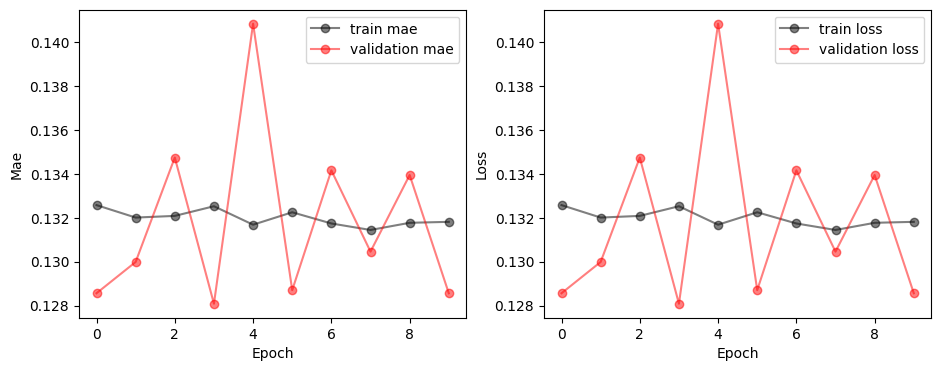

In [374]:
fig, ax = plt.subplots(1,2, figsize=(11, 4))
plot_accuracy_loss(n_epochs, history, ax)

In [375]:
# predict scaled y values
y_pred_scaled = model.predict(X_val_scaled)

# concat predictions
val_pred = pd.concat([X_val_scaled[features], pd.DataFrame(y_pred_scaled)], axis=1)

y_pred = val_scaler.inverse_transform(val_pred)[:,-1]

mae = tf.metrics.mean_absolute_error(y_true = y_val_scaled, y_pred = y_pred)
mae

381/381 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(), dtype=float64, numpy=146733.78610317176>

In [376]:
np.mean(abs(np.array(y_val)-y_pred))

5803.841004716597

5864.896761165613

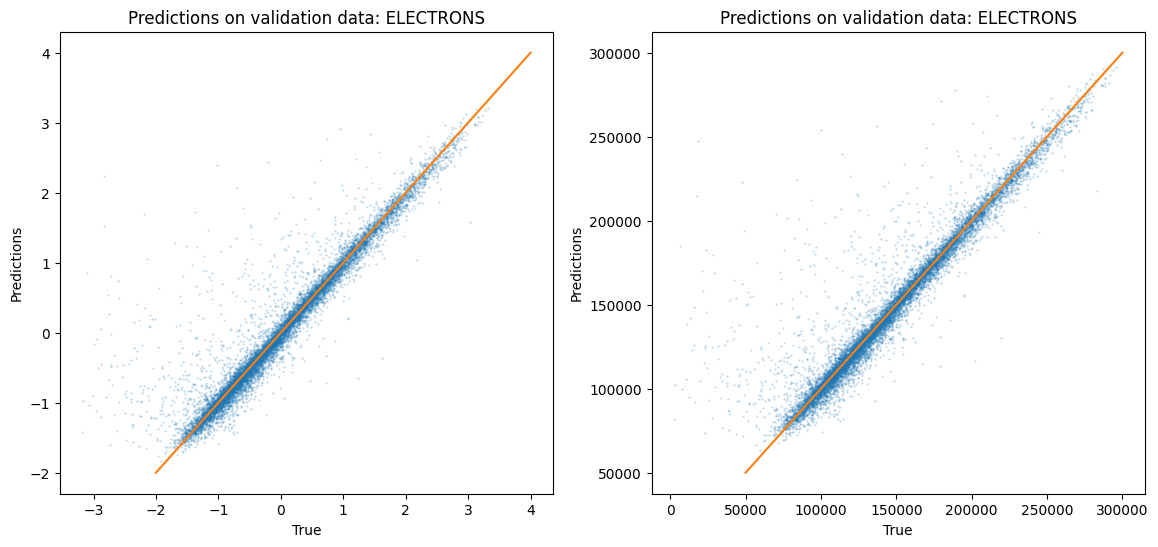

In [367]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].set(title='Predictions on validation data: ELECTRONS', xlabel='True', ylabel='Predictions')
ax[0].plot(y_val_scaled, y_pred_scaled, '.', ms=1, alpha=0.3)
ax[0].plot([-2, 4], [-2, 4])

ax[1].set(title='Predictions on validation data: ELECTRONS', xlabel='True', ylabel='Predictions')
ax[1].plot(y_val, y_pred, '.', ms=1, alpha=0.3)
ax[1].plot([5e4, 3e5], [5e4, 3e5])

In [368]:
# predict scaled y values
y_test_pred_scaled = model.predict(X_test_scaled)

# concat predictions
test_pred = pd.concat([X_test_scaled[features], pd.DataFrame(y_test_pred_scaled)], axis=1)

y_test_pred = train_scaler.inverse_transform(test_pred)[:,-1]

5021/5021 [==============================] - 8s 2ms/step


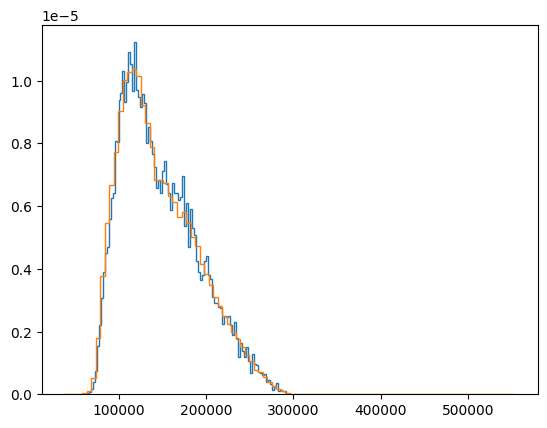

In [369]:
plt.hist(y_pred, histtype='step', density=True, bins=100);
plt.hist(y_test_pred, histtype='step', density=True, bins=100);

In [370]:
df = pd.DataFrame(y_test_pred)
df.to_csv('Regression_SophiaWilson_TensorFlowNeuralNetwork.csv', index=True)

In [371]:
df_features = pd.DataFrame(features)
df_features.to_csv('Regression_SophiaWilson_TensorFlowNeuralNetwork_VariableList.csv', index=False)

# Pytorch

In [340]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Set up the network hyperparameters
n_inputs = 19  # number of inputs: 15 features
n_hidden1 = 128  # number of neurons in first hidden layer: 128
n_hidden2 = 128  # number of neurons in second hidden layer: 128
n_hidden3 = 64  # number of neurons in first hidden layer: 64
n_hidden4 = 32  # number of neurons in first hidden layer: 32
n_outputs = 1  # number of outputs: 1 (can be either 0 or 1)
learning_rate = 0.001

# Define the network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.input_layer = nn.Linear(n_inputs, n_hidden1)
        self.hidden_layer_1 = nn.Linear(n_hidden1, n_hidden2)
        self.hidden_layer_2 = nn.Linear(n_hidden2, n_hidden3)
        self.hidden_layer_3 = nn.Linear(n_hidden3, n_hidden4)
        self.hidden_layer_4 = nn.Linear(n_hidden4, n_outputs)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        x = torch.relu(self.hidden_layer_1(x))
        x = torch.relu(self.hidden_layer_2(x))
        x = torch.relu(self.hidden_layer_3(x))
        x = self.hidden_layer_4(x)
        return x

model = Net()

# Define the loss function and optimizer
criterion = nn.L1Loss()  # L1 loss, equivalent to mean absolute error (MAE)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Convert the data to NumPy arrays
X_train_scaled = X_train_scaled.to_numpy(dtype=np.float32)
y_train_scaled = y_train_scaled.to_numpy(dtype=np.float32)
X_val_scaled = X_val_scaled.to_numpy(dtype=np.float32)
y_val_scaled = y_val_scaled.to_numpy(dtype=np.float32)

# Convert the NumPy arrays to PyTorch tensors
X_train_scaled = torch.tensor(X_train_scaled)
y_train_scaled = torch.tensor(y_train_scaled)
X_val_scaled = torch.tensor(X_val_scaled)
y_val_scaled = torch.tensor(y_val_scaled)

# Training the model
n_epochs = 25
batch_size = 256

print('--------- TRAINING ---------')
for epoch in range(n_epochs):
    # Randomly shuffle the data in each epoch (if desired)
    indices = torch.randperm(X_train_scaled.size(0))
    X_train_shuffled = X_train_scaled[indices]
    y_train_shuffled = y_train_scaled[indices]

    # Mini-batch training
    for i in range(0, X_train_scaled.size(0), batch_size):
        # Extract mini-batch
        inputs = X_train_shuffled[i:i+batch_size]
        targets = y_train_shuffled[i:i+batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    # Print the loss for this epoch
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')


--------- TRAINING ---------


/Users/sophiawilson/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Users/sophiawilson/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 1/25, Loss: 0.5981189012527466
Epoch 2/25, Loss: 0.760230302810669
Epoch 3/25, Loss: 1.0397075414657593
Epoch 4/25, Loss: 0.5039730072021484
Epoch 5/25, Loss: 0.636082649230957
Epoch 6/25, Loss: 0.7478029727935791
Epoch 7/25, Loss: 1.1011239290237427
Epoch 8/25, Loss: 0.7177318930625916
Epoch 9/25, Loss: 0.6583167314529419
Epoch 10/25, Loss: 1.2255960702896118
Epoch 11/25, Loss: 0.851747453212738
Epoch 12/25, Loss: 0.6436870098114014
Epoch 13/25, Loss: 0.570816695690155
Epoch 14/25, Loss: 0.8829339146614075
Epoch 15/25, Loss: 0.7216362357139587
Epoch 16/25, Loss: 0.49632978439331055
Epoch 17/25, Loss: 0.6843590140342712
Epoch 18/25, Loss: 0.8063391447067261
Epoch 19/25, Loss: 1.0472321510314941
Epoch 20/25, Loss: 0.7529426217079163
Epoch 21/25, Loss: 1.0228767395019531
Epoch 22/25, Loss: 0.7932581305503845
Epoch 23/25, Loss: 1.0156110525131226
Epoch 24/25, Loss: 0.5993174314498901
Epoch 25/25, Loss: 1.0044198036193848


In [346]:
# Predict scaled y values
with torch.no_grad():
    model.eval()
    y_pred_scaled = model(X_val_scaled)

# Convert the predictions to numpy arrays
y_pred_scaled = y_pred_scaled.numpy()

# Concatenate predictions
train_pred = np.concatenate((X_val_scaled, y_pred_scaled), axis=1)

# Inverse transform the predictions
y_pred = train_scaler.inverse_transform(train_pred)[:, -1]

# Calculate mean absolute error (MAE)
mae = np.mean(np.abs(y_pred - np.array(y_val_scaled)))
mae


139574.14

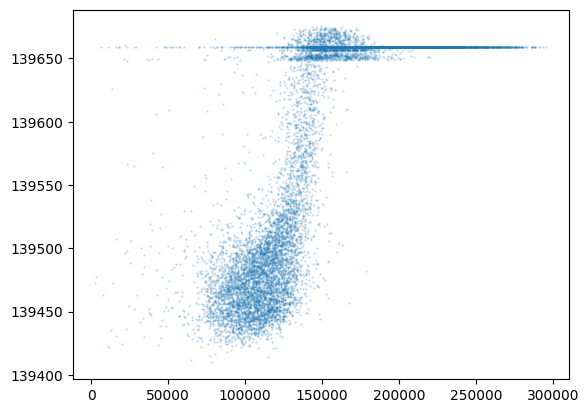

In [347]:
plt.plot(y_val, y_pred, '.', ms=1, alpha=0.3)
#.plot([5e4, 3e5], [5e4, 3e5])